# Assignment 1
## Data Collection & Preparation

####  API ที่เลือก :

Crash data from Queensland roads

Road crash locations เป็นข้อมูลเกี่ยวกับสถานที่และลักษณะของการขัดข้องภายในประเทศควีนส์แลนด์ สำหรับการจราจรบนถนนที่รายงานทั้งหมด --- 1 มกราคม 2544 ถึง 31 ธันวาคม 2561---


#### หมายเหตุ :
- อุบัติเหตุจราจรทางถนนร้ายแรง เก็บข้อมูลถึงวันที่ 31 ธันวาคม 2561 
- การรักษาในโรงพยาบาลการรักษาพยาบาลและการบาดเจ็บเล็กน้อย เก็บข้อมูลถึง 31 ธันวาคม 2561
- ความเสียหายต่อทรัพย์สินเท่านั้น เก็บข้อมูลถึงวันที่ 31 ธันวาคม 2553

link API : https://www.data.qld.gov.au/dataset/crash-data-from-queensland-roads/resource/e88943c0-5968-4972-a15f-38e120d72ec0?truncate=30&inner_span=True

In [217]:
import urllib
import requests
from pandas.io.json import json_normalize
import json
import pandas as pd
import numpy as np
import requests

#Request API
url = 'https://www.data.qld.gov.au/api/3/action/datastore_search?resource_id=e88943c0-5968-4972-a15f-38e120d72ec0&limit=29000'
r = requests.get(url) #แปลง API Request ตัวแปร r ให้เป็น dict
j = r.json() 


In [218]:
type(j) #ตรวจสอบ type 

dict

In [219]:
#ดึงข้อมูลเพื่อแสดงค่าใน dict มาใส่ใน DataFrame โดยอ้างอิงจาก key:result และ key:records 
df = pd.DataFrame(j)
df = pd.DataFrame(j["result"]["records"])

In [220]:
#การ save pandas DataFrame เป็นไฟล์ CSV ด้วย to_csv
df.to_csv("Data/Road_Crash_location.csv",index=False)

In [221]:
#ทำการอ่านไฟล์ข้อมูลที่ดาวน์โหลดเก็บไว้ใน Folder เข้ามาใน pandas และเรียกดูข้อมูลโดยใช้ ชื่อของข้อมูลที่เรากำหนด ซึ่งในที่นี้ เรากำหนดชื่อว่า roaddata
roaddata = pd.read_csv("Data/Road_Crash_location.csv",index_col="_id")
roaddata

,Crash_Ref_Number,Crash_Severity,Crash_Year,Crash_Month,Crash_Day_Of_Week,Crash_Hour,Crash_Nature,Crash_Type,Crash_Longitude_GDA94,Crash_Latitude_GDA94,...,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_Total,Count_Unit_Car,Count_Unit_Motorcycle_Moped,Count_Unit_Truck,Count_Unit_Bus,Count_Unit_Bicycle,Count_Unit_Pedestrian,Count_Unit_Other
_id,,,,,,,,,,,,,,,,,,,,,
1,1,Property damage only,2001,January,Monday,9,Angle,Multi-Vehicle,152.960485,-26.685052,...,0,0,0,2,0,0,0,0,0,0
2,2,Property damage only,2001,January,Tuesday,23,Hit object,Single Vehicle,153.038263,-27.550776,...,0,0,0,1,0,0,0,0,0,0
3,3,Medical treatment,2001,January,Tuesday,16,Angle,Multi-Vehicle,153.116342,-27.545153,...,1,0,1,2,0,0,0,0,0,0
4,4,Property damage only,2001,January,Tuesday,12,Rear-end,Multi-Vehicle,153.021629,-27.384448,...,0,0,0,2,0,0,0,0,0,0
5,5,Property damage only,2001,January,Tuesday,10,Rear-end,Multi-Vehicle,152.937497,-27.083184,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28993,28993,Minor injury,2014,August,Tuesday,16,Angle,Multi-Vehicle,153.041664,-27.414289,...,0,1,1,2,0,0,0,0,0,0
28994,28994,Hospitalisation,2014,August,Tuesday,7,Angle,Multi-Vehicle,153.012600,-27.777425,...,0,0,1,2,0,0,0,0,0,1
28995,28995,Hospitalisation,2014,August,Wednesday,17,Angle,Multi-Vehicle,152.927540,-27.176794,...,0,0,1,1,0,0,0,0,0,0


In [222]:
roaddata.shape #เช็คจำนวนแถว และจำนวนคอลัมน์
#roaddata.info()

(29000, 52)

In [223]:
roaddata.isnull().sum() #Check missing value

Crash_Ref_Number                       0
Crash_Severity                         0
Crash_Year                             0
Crash_Month                            0
Crash_Day_Of_Week                      0
Crash_Hour                             0
Crash_Nature                           0
Crash_Type                             0
Crash_Longitude_GDA94                  0
Crash_Latitude_GDA94                   0
Crash_Street                           2
Crash_Street_Intersecting          16220
State_Road_Name                    16113
Loc_Suburb                             0
Loc_Local_Government_Area              0
Loc_Post_Code                          0
Loc_Police_Division                    0
Loc_Police_District                    0
Loc_Police_Region                      0
Loc_Queensland_Transport_Region        0
Loc_Main_Roads_Region                  0
Loc_ABS_Statistical_Area_2             0
Loc_ABS_Statistical_Area_3             0
Loc_ABS_Statistical_Area_4             0
Loc_ABS_Remotene

In [224]:
#ลบแถวที่มี Missing Value
roaddata.drop('State_Road_Name', axis='columns', inplace=True)
roaddata.drop('DCA_Key_Approach_Dir', axis='columns', inplace=True)
roaddata.drop('Crash_Street_Intersecting', axis='columns', inplace=True)

#### การ Handling Outliers เป็นวิธีที่จัดการกับข้อมูลที่มีค่าสูงหรือค่าต่ำกว่าข้อมูลส่วนใหญ่โดยค่านั้นเรียกว่า Outlier

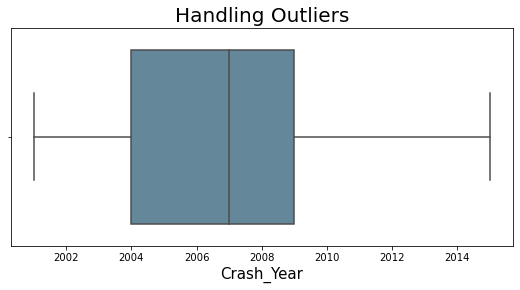

In [225]:
import seaborn as sns
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(9,4))
sns.boxplot(x=roaddata["Crash_Year"], color="#5b8ba3")
plt.xlabel("Crash_Year", fontsize=15)
plt.title('Handling Outliers', size = 20)
plt.show()

In [226]:
roaddata["Crash_Year"].describe() #ใช้ Function describe() เพื่อดูข้อมูลทางสถิติต่างๆ

count    29000.000000
mean      2006.655345
std          3.676297
min       2001.000000
25%       2004.000000
50%       2007.000000
75%       2009.000000
max       2015.000000
Name: Crash_Year, dtype: float64

In [227]:
print(df.shape)
upper_lim = roaddata["Crash_Year"].quantile(.95)
lower_lim = roaddata["Crash_Year"].quantile(.05)
drop_outlier = roaddata[(roaddata["Crash_Year"] < upper_lim) & (roaddata["Crash_Year"] > lower_lim)]
print(drop_outlier.shape)

(29000, 53)
(24431, 49)


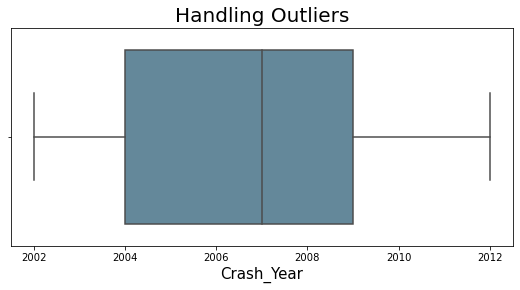

In [228]:
fig = plt.figure(figsize=(9,4))
sns.boxplot(x=drop_outlier["Crash_Year"], color="#5b8ba3")
plt.xlabel("Crash_Year", fontsize=15)
plt.title('Handling Outliers', size = 20)
plt.show()

In [229]:
drop_outlier["Crash_Year"].describe()

count    24431.000000
mean      2006.596906
std          2.975300
min       2002.000000
25%       2004.000000
50%       2007.000000
75%       2009.000000
max       2012.000000
Name: Crash_Year, dtype: float64

In [230]:
roaddata = pd.DataFrame(drop_outlier)
roaddata.shape 

(24431, 49)

## ประเภทของระดับความรุนแรงในการเกิดอุบัติเหตุประเภทไหนมีอัตราการเกิดมากที่สุด?

In [236]:
roaddata.Crash_Severity.value_counts() #Crash_Severity counts 

Property damage only    8393
Medical treatment       6472
Hospitalisation         5875
Minor injury            3380
Fatal                    311
Name: Crash_Severity, dtype: int64

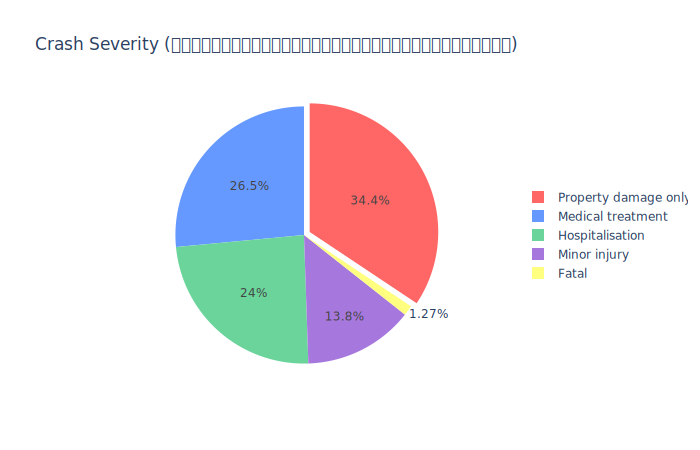

In [276]:
import plotly.io as pio
pio.renderers.default = "svg"
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

#ทำ data visualization ด้วยการ import plotly
#เลือก column ที่จะทำการวิเคราะห์ ในการวิเคราะห์นี้เลือกเป็น Crash_Severity 
## เพื่อวิเคราะห์หาว่าประเภทระดับความรุนแรงในการเกิดอุบัติเหตุประเภทไหนมีอัตราเกิดมากที่สุด

col = "Crash_Severity" 
grouped = roaddata[col].value_counts().reset_index() # ทำการ count value ใน column "Crash_Severity"
grouped = grouped.rename(columns = {col : "count", "index" : col}) 

## ส่วนของ plot

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#ff6666","#6699ff","#6ad49b", "#a678de","#ffff80"])) 
layout = go.Layout(title="Crash Severity (ระดับความรุนแรงในการเกิดอุบัติเหตุ)", height=400, legend=dict(x=1, y=0.5, font_size=12))
fig = go.Figure(data = [trace], layout = layout)
fig.show(renderer='svg')


### สรุปผล
ระดับความรุนแรงในการเกิดอุบัติเหตุส่วนใหญ่เป็นประเภท Property damage only คิดเป็นร้อยละ 34.4% 

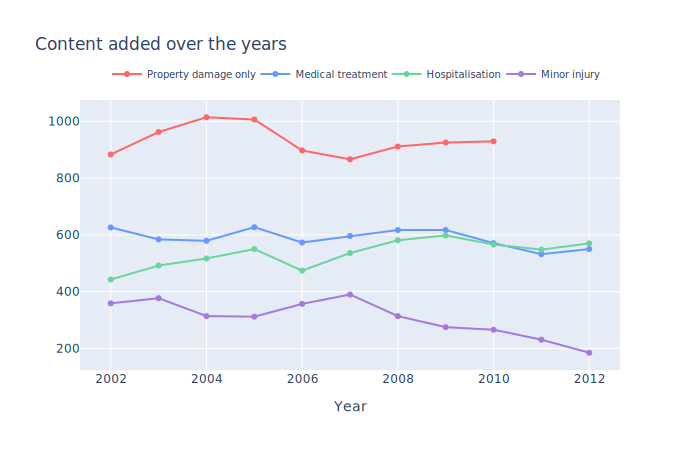

In [355]:
d1 = roaddata[roaddata["Crash_Severity"] == "Property damage only"]
d2 = roaddata[roaddata["Crash_Severity"] == "Medical treatment"]
d3 = roaddata[roaddata["Crash_Severity"] == "Hospitalisation"]
d4 = roaddata[roaddata["Crash_Severity"] == "Minor injury"]

col = "Crash_Year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

vc3 = d3[col].value_counts().reset_index()
vc3 = vc3.rename(columns = {col : "count", "index" : col})
vc3['percent'] = vc3['count'].apply(lambda x : 100*x/sum(vc3['count']))
vc3 = vc3.sort_values(col)

vc4 = d4[col].value_counts().reset_index()
vc4 = vc4.rename(columns = {col : "count", "index" : col})
vc4['percent'] = vc4['count'].apply(lambda x : 100*x/sum(vc4['count']))
vc4 = vc4.sort_values(col)


trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="Property damage only", marker=dict(color="#ff6666"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Medical treatment", marker=dict(color="#6699ff"))
trace3 = go.Scatter(x=vc3[col], y=vc3["count"], name="Hospitalisation", marker=dict(color="#6ad49b"))
trace4 = go.Scatter(x=vc4[col], y=vc4["count"], name="Minor injury", marker=dict(color="#a678de"))
data = [trace1, trace2, trace3,trace4]


layout = go.Layout(title="Content added over the years",    xaxis_title="Year",
    yaxis_title="",legend=dict(x=0.05, y=1.15, orientation="h" , font_size=10))
fig = go.Figure(data, layout=layout )
fig.show(renderer='svg')

หมายเหตุ
- ความเสียหายต่อทรัพย์สินเท่านั้น เก็บข้อมูลถึงวันที่ 31 ธันวาคม 2553